In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
dataset = pd.ExcelFile(r"C:\Users\vidhy\Downloads\V02Max_Combined.xlsx")

Athletes = pd.read_excel(dataset, sheet_name = 'Athletes')
Kayaking = pd.read_excel(dataset, sheet_name = 'Kayaking')
Triathlon = pd.read_excel(dataset, sheet_name = 'Triathlon')
Fencing = pd.read_excel(dataset, sheet_name = 'Fencing')


C:\Users\vidhy\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\vidhy\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\vidhy\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [ ]:
#7)Create a correlation matrix to show the relationship between HR, BMI and sport?

In [7]:
Athletes['BMI']=Athletes['Weight']/(Athletes['Height']**2)
#print(Athletes)

In [12]:
combined=pd.concat([Kayaking,Triathlon,Fencing])
print(combined)


def Heart_Rate(rr):
    return round(60*1000/rr,2)
def Heartrate_Zone(hr):
    if hr<100:
        return 'Zone 1 (recovery/easy)'
    elif hr>=100 and hr<120:
        return 'Zone 2 (Aerobic/base)'
    elif hr>=120 and hr<135:
        return 'Zone 3 (tempo)'
    elif hr>=135 and hr<155:
        return 'Zone 4 (Lactate threshold)'
    else:
        return 'Zone 5(AnAerobic)'
combined['HR']=combined['RR'].apply(Heart_Rate)
combined['HR_Zone']=combined['HR'].apply(Heartrate_Zone)
#pd.set_option('display.max_rows',1000)
print(combined)
        

       ID     time     RR       VO2  power
0      11 -168.600  727.0  0.287147      0
1      11 -167.872  728.0  0.287147      0
2      11 -167.148  724.0  0.287147      0
3      11 -166.484  664.0  0.320580      0
4      11 -165.836  648.0  0.320580      0
...    ..      ...    ...       ...    ...
27598  10  942.700  428.0  0.786363      0
27599  10  943.124  424.0  0.786363      0
27600  10  943.552  428.0  0.786363      0
27601  10  943.976  424.0  0.786363      0
27602  10  944.404  428.0  0.786363      0

[52062 rows x 5 columns]
       ID     time     RR       VO2  power      HR                     HR_Zone
0      11 -168.600  727.0  0.287147      0   82.53      Zone 1 (recovery/easy)
1      11 -167.872  728.0  0.287147      0   82.42      Zone 1 (recovery/easy)
2      11 -167.148  724.0  0.287147      0   82.87      Zone 1 (recovery/easy)
3      11 -166.484  664.0  0.320580      0   90.36      Zone 1 (recovery/easy)
4      11 -165.836  648.0  0.320580      0   92.59      Zone 1 

In [23]:
merged=pd.merge(combined,Athletes,on='ID')
print(merged)

       ID     time     RR       VO2  power      HR  \
0      11 -168.600  727.0  0.287147      0   82.53   
1      11 -167.872  728.0  0.287147      0   82.42   
2      11 -167.148  724.0  0.287147      0   82.87   
3      11 -166.484  664.0  0.320580      0   90.36   
4      11 -165.836  648.0  0.320580      0   92.59   
...    ..      ...    ...       ...    ...     ...   
52057  10  942.700  428.0  0.786363      0  140.19   
52058  10  943.124  424.0  0.786363      0  141.51   
52059  10  943.552  428.0  0.786363      0  140.19   
52060  10  943.976  424.0  0.786363      0  141.51   
52061  10  944.404  428.0  0.786363      0  140.19   

                          HR_Zone  age  Weight  Height  P_vt1  P_vt2    sport  \
0          Zone 1 (recovery/easy)   18    84.8     182    174    268    kayak   
1          Zone 1 (recovery/easy)   18    84.8     182    174    268    kayak   
2          Zone 1 (recovery/easy)   18    84.8     182    174    268    kayak   
3          Zone 1 (recovery

In [10]:
merged['sport_num']=pd.factorize(merged['sport'])[0]
#correlate=merged[['BMI','sport_num','HR']]
correlation_matrix=merged[['BMI','sport_num','HR']].corr()
print(correlation_matrix)

                BMI  sport_num        HR
BMI        1.000000  -0.346155 -0.056931
sport_num -0.346155   1.000000  0.039016
HR        -0.056931   0.039016  1.000000


In [ ]:
#11)Create any 3d plot using any data. Values do not have to be from the dataset given?

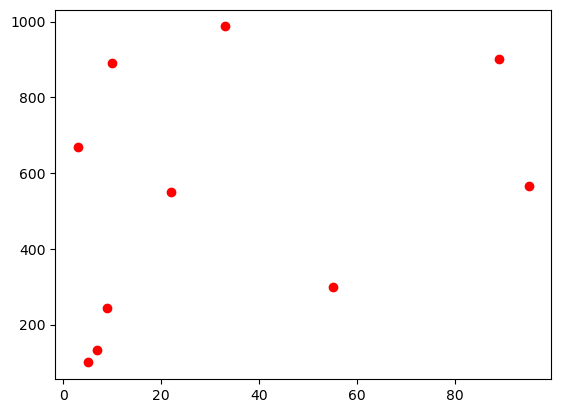

In [15]:

import matplotlib.pyplot as plt
x=[5,7,9,22,3,89,10,95,33,55]
y=[100,133,244,550,670,900,890,567,987,300]
plt.scatter(x,y,c='red')
plt.show()
   


In [ ]:
#10)What was the average HRV of the triathletes?

In [22]:
triathlon=merged[merged['sport']=='triathlon']
#print(triathlon)
#print(merged)
HRV=triathlon['RR'].std()
print(f"The average HRV of the Triathlon is {HRV:.2f}")


The average HRV of the Triathlon is 138.40


In [ ]:
#10)How long was athlete 12 in HR Zone 5?

In [30]:
Athelet_12= merged[merged['ID']==12]
Athelet_12_Zone5= Athelet_12[Athelet_12['HR_Zone']==5]
print(Athelet_12_Zone5)
Total_time=Athelet_12_Zone5['time'].sum()
print(Total_time)


Empty DataFrame
Columns: [ID, time, RR, VO2, power, HR, HR_Zone, age, Weight, Height, P_vt1, P_vt2, sport, Gender, Ethnicity, First Name, Last Name, BMI]
Index: []
0.0


In [ ]:
#2)Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly?

In [11]:
conditions=[
    (combined['time']<0),
    (combined['time']>0) & (combined['power']>0),
    (combined['power']<=0)
]
choices=['Warm up','Get','Cool down']
combined['stage']=np.select(conditions,choices,default='cool down')
print(combined)                           

       ID     time     RR       VO2  power      HR  \
0      11 -168.600  727.0  0.287147      0   82.53   
1      11 -167.872  728.0  0.287147      0   82.42   
2      11 -167.148  724.0  0.287147      0   82.87   
3      11 -166.484  664.0  0.320580      0   90.36   
4      11 -165.836  648.0  0.320580      0   92.59   
...    ..      ...    ...       ...    ...     ...   
27598  10  942.700  428.0  0.786363      0  140.19   
27599  10  943.124  424.0  0.786363      0  141.51   
27600  10  943.552  428.0  0.786363      0  140.19   
27601  10  943.976  424.0  0.786363      0  141.51   
27602  10  944.404  428.0  0.786363      0  140.19   

                          HR_Zone      stage  
0          Zone 1 (recovery/easy)    Warm up  
1          Zone 1 (recovery/easy)    Warm up  
2          Zone 1 (recovery/easy)    Warm up  
3          Zone 1 (recovery/easy)    Warm up  
4          Zone 1 (recovery/easy)    Warm up  
...                           ...        ...  
27598  Zone 4 (Lactate